<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%98%E3%82%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%9B%9E%E5%B8%B0%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%98%E3%82%99%E3%83%AB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**回帰コース**


---


回帰コースでは、**数値を予測する機械学習モデル「線形回帰」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル１（★☆☆☆）



---
レベル1では、レベル0で学んだ方法をより実践的なデータに活用し、データの前処理とモデルの構築に取り組みます。まず、データの理解でデータを確認していきます。その知見を踏まえ、データの加工とモデルの構築・評価をしていきます。

##1.1. データの理解

それでは、今回扱うデータの理解をしていきます。データの理解は、その後のデータの加工と構築に重要な手続きです。今回のデータでは、自動車の外観や性能に関する約200件のデータを扱います。前回のように理解するのも容易ではありません。まず、数十件程度データを直接確認し、その後、各特徴量について調べていきましょう。

それでは、まず下記のリンクから「自動車価格Data」をダウンロードしてください。下記の青字にマウスのカーソルを合わせてクリックしてリンク先に飛び、ダウンロードボタンを左クリックしてください。ダウンロードボタンが見つからない場合は、「︙（その他の機能）」を左クリックし、ダウンロードボタンを探してください。
[自動車価格Data.csv](https://drive.google.com/file/d/10gmRMbUVuDF8osJGdIop2b58PWDh7ezp/view?usp=drive_link)

ダウンロードできたら、レベル0で扱ったファイルの位置にドラッグ&ドロップ（ファイル上でマウスの左ボタンを押したまま動かす）してみてください。自動車Data.csvファイルを所定の位置にアップロードできたら、下記のコードでcsvファイルを読み込んでデータフレームとして確認してみましょう。

In [ ]:
import pandas as pd

df = pd.read_csv('自動車価格Data.csv')

df

,engine-size,city-mpg,curb-weight,price
0,130,21,2548,13495.0
1,130,21,2548,16500.0
2,152,19,2823,16500.0
3,109,24,2337,13950.0
4,136,18,2824,17450.0
...,...,...,...,...
200,141,23,2952,16845.0
201,141,19,3049,19045.0
202,173,18,3012,21485.0
203,145,26,3217,22470.0


len関数を使用することで、データフレームの行数を確認できます。

In [ ]:
len(df)

205

データが約200件あるため、先頭と末尾の5件だけ表示され、その他のデータは見えない状態になっています。データフレームのheadメソッドを使用すると、先頭からかっこ内で引数として指定した数のデータを表示できます。末尾から任意の件数を表示させたい場合は、tailメソッドを使用します。

In [ ]:
df.head(10)

,engine-size,city-mpg,curb-weight,price
0,130,21,2548,13495.0
1,130,21,2548,16500.0
2,152,19,2823,16500.0
3,109,24,2337,13950.0
4,136,18,2824,17450.0
5,136,19,2507,15250.0
6,136,19,2844,17710.0
7,136,19,2954,18920.0
8,131,17,3086,23875.0
9,131,16,3053,NaN


In [ ]:
df.tail(10)

,engine-size,city-mpg,curb-weight,price
195,141,23,3034,13415.0
196,141,24,2935,15985.0
197,141,24,3042,16515.0
198,130,17,3045,18420.0
199,130,17,3157,18950.0
200,141,23,2952,16845.0
201,141,19,3049,19045.0
202,173,18,3012,21485.0
203,145,26,3217,22470.0
204,141,19,3062,22625.0


ここから、「engine-size（エンジンの大きさ）」、「curb-weight（車両重量）」、および「city-mpg（市街地燃費）」の特徴量が確認できます。
今回はこの量的データを使って価格を予測していきます。
これまでになかった点としてpriceの列に、「NaN」と書かれているのがわかります。NaNは、「Not a Number」の略であり、数値データがない、つまり、データが欠損していることを表しています。ファイルを開いてみると、NaNの箇所が空欄となっているのが確認できます。

データの確認において、データの特徴を理解するのも重要ですが、実務上必ず必要なのが欠損値の確認です。欠損値とは、何らかの理由で、値が記録されておらず、存在しない状態を指します。欠損値がある状態では、分析ができないため、初めて扱うデータでは、まず、欠損値があるかを確認し、欠損値がある場合は適切な処理が必要になります。さきほど、price列に欠損値を確認できましたが、他の特徴量にも欠損値があるのか、また、どれくらいあるのかはわからないため、調べる必要があります。データフレームのisnullメソッドを使用すると、各データごとに欠損値の有無を論理値（TrueかFalse）で表したデータフレームが返ってきます。

In [ ]:
df_isnull = df.isnull()
df_isnull

,engine-size,city-mpg,curb-weight,price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
200,False,False,False,False
201,False,False,False,False
202,False,False,False,False
203,False,False,False,False


さらにsum関数を適用すると、Trueは1、Falseは0として扱われるため、欠損値であるTrueの数を各列で合計できるため、各列の欠損値の量が分かります。

In [ ]:
df_isnull.sum()

,0
engine-size,0
city-mpg,0
curb-weight,0
price,4


欠損値は、priceの列にのみ存在し、4件あることが分かりました。

なお、段階的に説明するために、データフレームのis_nullメソッドの返り値となるデータフレームを一度変数に保持してからsumメソッドを使用しましたが、連続して呼び出すこともできます。以後、欠損値の確認時はこちらのコードを使用します。

In [ ]:
df.isnull().sum()

,0
engine-size,0
city-mpg,0
curb-weight,0
price,4


次に、それぞれの列の統計量を確認します。describeメソッドを使用すると、平均、標準偏差、最小値、最大値、四分位数などの統計量を得ることができます。ここで25%とは、データを小さい順に並べて全体の25%（1/4）のところのデータ、つまり第1四分位数（Q1）を示しています。同様に、50%は中央値、75%は第3四分位数（Q3）を示しています。



In [ ]:
df.describe()

,engine-size,city-mpg,curb-weight,price
count,205.000000,205.000000,205.000000,201.000000
mean,126.907317,25.219512,2555.565854,13207.129353
std,41.642693,6.542142,520.680204,7947.066342
min,61.000000,13.000000,1488.000000,5118.000000
25%,97.000000,19.000000,2145.000000,7775.000000
50%,120.000000,24.000000,2414.000000,10295.000000
75%,141.000000,30.000000,2935.000000,16500.000000
max,326.000000,49.000000,4066.000000,45400.000000


最後に、説明変数であるengine-size、curb-weight、city-mpgと目的変数であるpriceの関係を可視化するために**散布図**を作成してみます。可視化には、matplotlibライブラリのpyplotモジュールをインポートします。

In [ ]:
import matplotlib.pyplot as plt

scatter関数を使うと、散布図を描くことができます。( )の中で1つ目の引数にはx軸にプロットするデータ、2つ目の引数にはy軸にプロットするデータを指定します。以下の例では、x軸にはdfの'engine-size'カラムを、y軸には'price'カラムを指定しています。
また、xlabel関数とylabel関数を使うことで、それぞれx軸とy軸のラベルを設定できます。最後にshow関数で、作成したプロットを表示します。


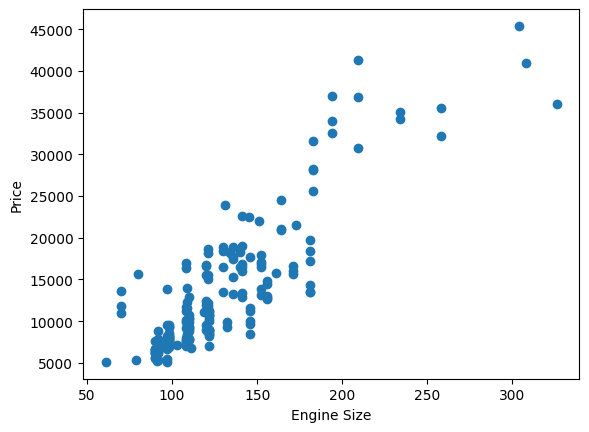

In [ ]:
plt.scatter(df['engine-size'], df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

engine-sizeが大きくなるほど、priceも高くなる傾向にあることが分かりました。同様にcity-mpgについても散布図を作成してみます。


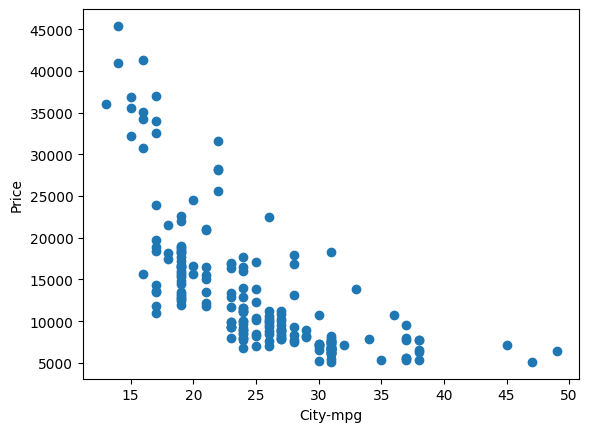

In [ ]:
plt.scatter(df['city-mpg'], df['price'])
plt.xlabel('City-mpg')
plt.ylabel('Price')
plt.show()

city-mpgが大きくなるほど、priceは低くなる傾向にあることが分かりました。

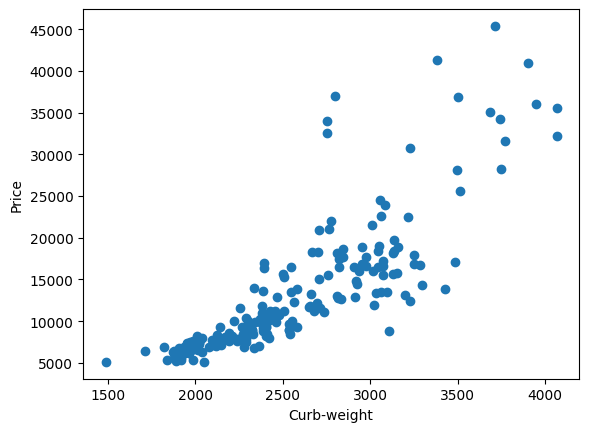

In [ ]:
plt.scatter(df['curb-weight'], df['price'])
plt.xlabel('Curb-weight')
plt.ylabel('Price')
plt.show()

curb-weightが大きくなるほど、priceも高くなる傾向にあることが分かりました。

##1.2. データの前処理

次は、データの前処理をしていきます。

先ほどデータの理解の際に、一部のデータが欠損していることが分かりました。この欠損値を処理するために、dropnaメソッドを使用して、欠損値を1つでも含む行をデータフレームから削除しています。

In [ ]:
df_drop = df.dropna()

なお、dropnaメソッドでは、元のデータフレーム自体からは欠損値は除かれません。元のデータフレームでisnullメソッドを使用すると欠損値が確認できます。

In [ ]:
df.isnull().sum()

,0
engine-size,0
city-mpg,0
curb-weight,0
price,4


In [ ]:
print('削除前のデータ数', len(df))
print('削除後のデータ数', len(df_drop))

削除前のデータ数 205
削除後のデータ数 201


データを説明変数と目的変数に分割します。レベル0ではデータから説明変数を複数指定して列を抽出する方法を紹介しましたが、データから目的変数だけを指定することで削除する方法もあります。dropメソッドを用いると、特定の行や列を削除することができます。削除したいカラムやインデックスを第一引数として渡します。また、axis引数を指定しない場合、デフォルトでaxis=0となり行が削除されます。axis=1を指定すると列が削除されます。


In [ ]:
X = df_drop.drop('price', axis=1)
y = df_drop['price']

Xにprice列以外の列が全て入ってるか確認しましょう。

In [ ]:
X

,engine-size,city-mpg,curb-weight
0,130,21,2548
1,130,21,2548
2,152,19,2823
3,109,24,2337
4,136,18,2824
...,...,...,...
200,141,23,2952
201,141,19,3049
202,173,18,3012
203,145,26,3217


##1.3. モデルの構築＆評価

今回もレベル0と同じく重回帰を用いた回帰モデルを構築します。モデル構築と評価は、前回とほとんど同じ作業になります。レベル0では、全データでモデルを学習させ、同じデータでモデルの予測精度を評価しました。しかし、これでは、未知のデータを予測できるかは評価できません。本来の目的は、モデルを構築した後、未知データの予測にあります。未知データの予測精度を評価する方法に、**ホールドアウト法**があります。ホールドアウト法は、全データを学習に使用するのではなく、データを学習用（訓練データ）と評価用（テストデータ）に分けます。そして、モデルの学習に使用しないテストデータで高い予測精度が出せるかを評価します。教科書の問題を丸暗記しただけでは、試験を合格できるかは分からないのと同じです。

今回は、さらに**交差検証**を組み合わせます。自動車価格のデータは200個と少なく、どのデータを学習に使ったかによってモデルの性能が大きく変わる可能性があります。そのため、データを複数回に分けて学習とテストを繰り返す交差検証を行うことで、モデルの性能をより正確に評価することができます。

交差検証には、sklearn.model_selectionモジュールからKFoldクラスとcross_val_score関数をインポートします。KFoldのn_splitsパラメータで、データを5分割するように指定しています。
5分割されたデータのうち、1個のみが順にテストデータとして使われ、残りの4個は訓練データとして使われます。つまり、交差検証では各分割が一度ずつテストデータとして使用され、残りの分割が訓練データとして使用されます。shuffle=Trueでは、データを分割する前にシャッフルして、ランダムな分割を行うことを指定しています。

cross_val_scoreでは、指定したモデルとデータに対して交差検証を実行し、各分割ごとのスコアを計算します。

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

これだけでモデルの学習と評価が済みました。

ここで精度の測り方としてr2を指定しています。これは**決定係数$R^2$**で、モデルの適合度を評価する指標です。0〜1の値を取り、以下の式で表されます。

\begin{eqnarray}
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{eqnarray}

$n$はデータの総数（データフレームにおいては行数）を表し、$y_i$は$i$番目のデータの実測値、$f(x_i)$はそのデータに対するモデルの予測値を指します。また、$\bar{y}$は目的変数$y$の平均値を表しています。

つまり二項目の分子部分の式 $\sum_{i=1}^n (y_i - f(x_i))^2$ は、誤差（予測値と実測値の差）の二乗和を示しています。予測が正確であるほど、この値が小さくなり、結果的に$R^2$の値が1に近づきます。

今回はデータを5分割したため、5つの異なる決定係数が得られます。

In [ ]:
print('各分割における決定係数:', scores)
print('クロスバリデーションの平均決定係数:', scores.mean())

各分割における決定係数: [0.74570389 0.8328456  0.83827622 0.6746478  0.71840916]
クロスバリデーションの平均決定係数: 0.7619765325212035


一般に決定係数には絶対的な基準がなく、分野によっても異なります。ゆえに決定係数同士の比較でモデルの精度を確認することが重要です。
今回の0.762という値は高い値ではありますが、決定係数は1に近づくほどモデルの予測精度が高いことを示すため、さらなる改善の余地があると考えられます。

##1.4.演習問題

問1-1.下記リンクの「回帰コースLv1演習Data.csv」をダウンロードしてファイルをアップロードし、pandasのデータフレームとして読み込んでください。読み込んだデータの最初の5行のデータを表示して確認してください。

[回帰コースLv1演習Data.csv](https://drive.google.com/file/d/1uW2cKGLxyduR0XcU_zRguHBHf35nz4gS/view?usp=drive_link)



問1-2.上の問題で読み込んだデータフレームを利用し、欠損値の数を各列ごとに確認してください。

問1-3.上の問題で読み込んだデータフレームの欠損値のある行を削除したデータフレームを作成してください。

問1-4.問1-3で作成したデータフレームを用いて、x軸をengine-sizeにy軸をpriceに設定した散布図を作成してください。